# Car Price Analysis

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading our dataset
data1 = pd.read_csv('car data.csv')

# Data Analysis

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
data1.shape

(301, 9)

In [5]:
# Display random 5 records
data1.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
94,corolla altis,2008,4.00,22.78,89000,Petrol,Dealer,Automatic,0
288,city,2015,8.40,13.60,34000,Petrol,Dealer,Manual,0
287,amaze,2015,5.75,7.50,44000,Petrol,Dealer,Automatic,0
158,Honda Dream Yuga,2017,0.48,0.54,8600,Petrol,Individual,Manual,0
209,grand i10,2015,4.85,5.70,21125,Diesel,Dealer,Manual,0


In [6]:
# Removing Duplicates
data1[data1.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [7]:
# Dataset information
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Checking Null values
data1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Description of Data
data1.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
data1.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
257,city,2015,8.50,13.60,40324,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
152,Bajaj Pulsar NS 200,2012,0.50,0.99,13000,Petrol,Individual,Manual,0
76,corolla altis,2013,5.50,14.68,72000,Petrol,Dealer,Manual,0


# Data Cleaning

In [11]:
# Splitting Column value
data1['Company Name']  = data1['Car_Name'].apply(lambda x : x.split()[0])

In [12]:
# Drop Column
data1.drop('Car_Name',axis = 1, inplace= True)

In [13]:
# Displaying Top 5 Records
data1.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Company Name
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift


In [14]:
# Display Distinct Company names
data1['Company Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [15]:
def replace(error,correct):
    data1['Company Name'] = data1['Company Name'].replace(to_replace=error,value=correct)

In [16]:
# Replacing error values
replace('maxda','mazda')
replace('porcshce','porsche')
replace('Nissan','nissan')
replace('vw','volkswagen')
replace('vokswagen','volkswagen')
replace('toyouta','toyota')

In [17]:
data1['Company Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [18]:
data1.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Company Name'],
      dtype='object')

In [19]:
data1.sample(5)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Company Name
237,2015,11.25,13.60,68000,Diesel,Dealer,Manual,0,creta
274,2014,5.30,6.80,16500,Petrol,Dealer,Manual,0,brio
236,2016,3.10,4.43,11849,Petrol,Dealer,Manual,0,eon
68,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0,corolla
38,2016,3.00,3.76,10079,Petrol,Dealer,Manual,0,alto


# Data visualization

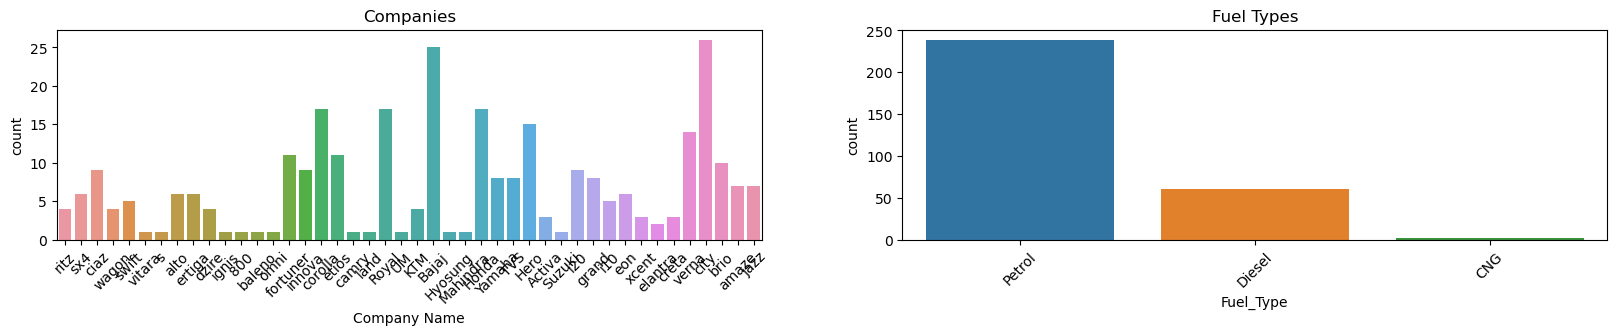

In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(2, 2, 1)
plt1 = sns.countplot(x='Company Name', data=data1)
plt.title('Companies')
ax1 = plt.gca()  # Get the current axis
ax1.tick_params(axis='x', labelrotation=45)
plt.subplot(2, 2, 2)
plt2 = sns.countplot(x='Fuel_Type', data=data1)
plt.title('Fuel Types')
ax2 = plt.gca()  # Get the current axis
ax2.tick_params(axis='x', labelrotation=45)
# You can continue adding more subplots as needed
plt.show()

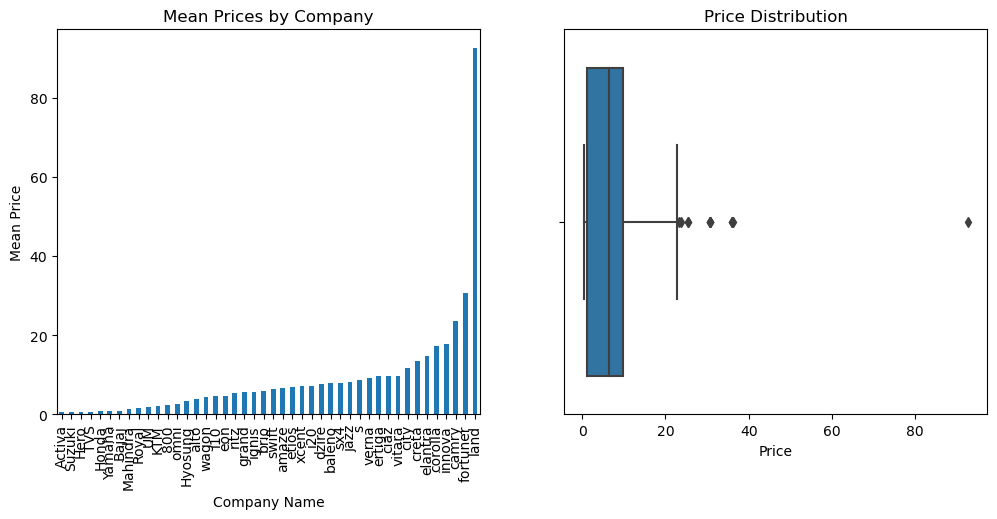

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data1.groupby('Company Name').mean()['Present_Price'].sort_values().plot(kind='bar')
plt.title('Mean Prices by Company')
plt.xlabel('Company Name')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
sns.boxplot(x='Present_Price', data=data1)
plt.title('Price Distribution')
plt.xlabel('Price')

plt.show()
